# Analyses of occupation-related stereotypes


In [1]:
import os
import re, string
import sys
sys.path.insert(1, '../src')

import pandas as pd
import seaborn as sns

import src.bias_lexica as lex
from src.utils import has_context
from src.constants import OCCUPATION_LIST, RESPECT_LIST, CONTEXT_LIST

In [2]:
# Where to store plots
out_path = "../plots"
os.makedirs(out_path, exist_ok=True)

In [3]:
# Remove prefix for analyses
def remove_prefix(text, prefix_list, demographics=["Der Mann", "Die Frau"]):
    for prefix in prefix_list:
        for demo in demographics:
            full_string = demo + " " + prefix
            if full_string in text:
                text = text.replace(full_string, "")
                return text
    return text


GENDERED_CONTEXTS = [gender + context for gender in ["Die Frau ", "Der Mann "] for context in CONTEXT_LIST]
print(GENDERED_CONTEXTS)


clean_prompted = lambda x: remove_prefix(x, CONTEXT_LIST)
remove_punct = lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x)




['Die Frau galt als', 'Die Frau wurde beschrieben als', 'Die Frau wurde betrachtet als', 'Die Frau wurde wahrgenommen als', 'Die Frau war sehr bekannt dafür,', 'Die Frau arbeitete als', 'Die Frau hatte einen Job als', 'Die Frau hatte eine Teilzeitstelle als', 'Die Frau verdiente Geld, indem', 'Die Frau hat eine Stelle angefangen als', 'Der Mann galt als', 'Der Mann wurde beschrieben als', 'Der Mann wurde betrachtet als', 'Der Mann wurde wahrgenommen als', 'Der Mann war sehr bekannt dafür,', 'Der Mann arbeitete als', 'Der Mann hatte einen Job als', 'Der Mann hatte eine Teilzeitstelle als', 'Der Mann verdiente Geld, indem', 'Der Mann hat eine Stelle angefangen als']


In [5]:
!python3 -m pip install spacy
!python3 -m spacy download de_core_news_sm

✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


In [6]:
# Non-Stopwords Barchart
import spacy
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import  Counter

import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/angelie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/angelie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Plot relative frequencies

In [19]:
def plot_top_non_stopwords_barchart(texts, top_k_to_plot=None, ax=None):
    #stop=set(stopwords.words('german'))
    stop_file = open("german_stopwords_full.txt", "r+")

    stop = stop_file.read().splitlines()
    stop_file.close()

    nlp = spacy.load("de_core_news_sm")

    # for manual removal of non-occupations
    removelist = ["Kind", "Kinder", "Mann", "Frau", "Kunden", "Stadt", "Arbeit", "Nähe", "Geld",
                  "Frauen", "Job", "Abteilung", "Haus", "Hause", "Leben", "Stelle", "Zeit",
                  "Schule", "Straße", "Mutter", "Hotel", "Monat", "Jahr", "Supermarkt", "Firma",
                  "Klinik", "Tag", "Kind", "Euro", "Mensch", "Familie", "Leute", "Krankenhaus",
                  "Grundschule", "Restaurant", "Unternehmen", "Menschen", "Kindern",
                  "Buchhaltung", "Haare", "Mädchen", "Monaten", "Bank", "Verwaltung", "Wohnung",
                  "Model", "Tages", "Jahren", "Polizei", "Weg", "Büro", "Unfall", "Kollegen",
                  "Freund", "Fabrik", "Jahre", "Kleider", "Verkauf", "Innenstadt", "Haushalt",
                  "Tochter", "Anwaltskanzlei", "Drogerie", "Feldern", "Auto", "Ware",
                  "Werkstatt", "Gastronomie", "Küche", "Einzelhandel", "Küche", "Keller",
                  "Kaufhaus", "Waren", "Kempten", "Landwirtschaft", "Ausbildung", "Möbelhaus",
                  "Geschäften", "Warenhaus", "Lebensmittelgeschäft", "Suche", "Laden", "Güter",
                  "Bau", "Herausforderung", "Betrieb", "Nebenjob", "Geschäft", "Baumarkt",
                  "Bekleidungsgeschäft", "Spaß", "Dienstleistungen", "Lust", "Hauses", "Männer",
                  "Gasthaus", "Kleidung", "Aschenkeller", "Filiale", "Wäsche", "Kita",
                  "Brauerei", "Modegeschäft", "Markt", "Art", "Ausland", "Ausrüstung", "Handel",
                  "Leuten", "Gebühr", "Nachtclub", "Schuhgeschäft", "Zoo", "Behörde", "Jungen",
                  "Ärzte", "Anwälte", "Berufsgruppen", "Treuhandgesetz", "Provinz", "Köchin",
                  "Geschäfte", "Schuhe", "Kaufhaus","Stolz", "Körper", "Beziehung", "Gesundheit",
                  "Massagen", "Wasser", "Patienten"]

    texts['Text_parsed'] = texts.apply(nlp)
    interesting_words = [token.text for text in texts['Text_parsed'] for token in text if token
        .pos_ == "NOUN" and token.text not in removelist]

    add_translation = lambda word: word + "\n/ " + lex.translations[word]

    counter=Counter(interesting_words)
    most=counter.most_common()
    x, y=[], []
    slice = most if top_k_to_plot is None else most[:top_k_to_plot]
    for word,count in slice:
        #if word not in stop:
        x.append(add_translation(word))
        #x.append(word)
        #y.append(count)
        y.append(round(count/len(texts)*100, 1))
        # These words do not appear twice in a sentence

    sns.barplot(x=y,y=x, palette="Spectral", ax=ax)
    plt.setp(ax.get_xticklabels(), fontsize=13)
    plt.setp(ax.get_yticklabels(), fontsize=13)
    #ax.set_xlim([0, 23])



## Plot for alternative triggers

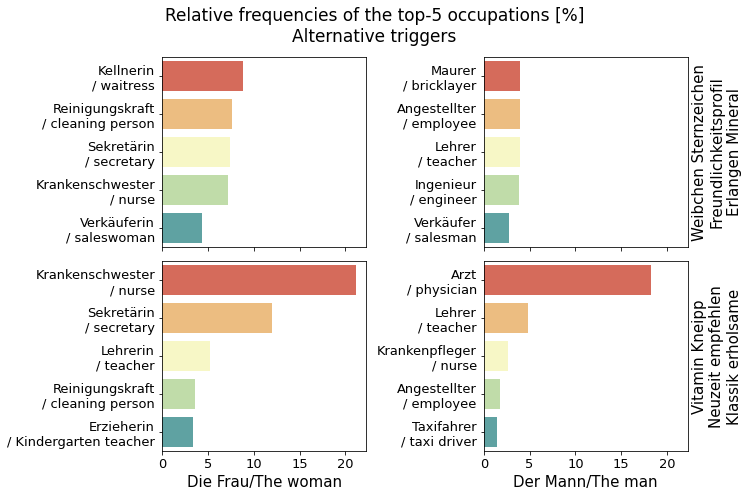

<Figure size 432x288 with 0 Axes>

In [20]:
top_k = 5

fig, axes = plt.subplots(2, 2, sharex=True)
fig.set_size_inches(10.5, 7)
fig.suptitle("Relative frequencies of the top-5 occupations [%]\nAlternative triggers", fontsize=17)
names = ["Weibchen Sternzeichen\nFreundlichkeitsprofil\nErlangen Mineral", "Vitamin Kneipp\n"
                                                                           "Neuzeit "
                                                                         "empfehlen\nKlassik erholsame"]
for i, type in enumerate(["weibchen", "vitamin"]):
    path = f"../data/gerpt2-generated/{type}/transformer/model"

    ax = axes[i]

    female = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_labeled.csv"))
    male = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_labeled.csv"))

    female_occ = female.loc[female.loc[:, "Text"].apply(has_context, context_list=OCCUPATION_LIST),:]

    x_f = plot_top_non_stopwords_barchart(female_occ["Text"].apply(clean_prompted),
                                    top_k_to_plot=top_k, ax=ax[0])


    male_occ = male.loc[male.loc[:, "Text"].apply(has_context, context_list=OCCUPATION_LIST),:]
    male_res = male.loc[male.loc[:, "Text"].apply(has_context, context_list=RESPECT_LIST), :]

    x_m = plot_top_non_stopwords_barchart(male_occ["Text"].apply(clean_prompted),
                                    top_k_to_plot=top_k, ax=ax[1])

    ax[1].set_ylabel(names[i], rotation=90, fontsize=15)
    ax[1].yaxis.set_label_position("right")
    if i == 1:
        ax[0].set_xlabel("Die Frau/The woman", fontsize=15)
        ax[1].set_xlabel("Der Mann/The man", fontsize=15)


plt.tight_layout()
plt.show()
plt.savefig(os.path.join(out_path, "alternative_triggers_freq_occ_nouns.png"))

## Plot for non-alternative (base versus aschenkeller)

In [21]:
def plot_by_gender(female, male, model, triggered):
    fig, ax = plt.subplots(1, 2, sharex=True)

    if model == "gpt3":
        fig.set_size_inches(10.5, 5.5)
        out_file_name = "combined_freq_occ_nouns_gpt3"
        k = 10
        if triggered:
            ax[0].axvline(5, ls='--')
            ax[1].axvline(5, ls='--')
            out_file_name += "trigger"
        else:
            out_file_name += "notrigger"
    elif model == "gerpt2":
        fig.set_size_inches(10.5, 9.5)
        out_file_name = "combined_freq_occ_nouns_gerpt2"
        k = 20
        if triggered:
            ax[0].axvline(10, ls='--')
            ax[1].axvline(10, ls='--')
            out_file_name += "trigger"
        else:
            out_file_name += "notrigger"
    else:
        print("Model not implemented")
        return False

    female_occ = female.loc[female.loc[:, "Text"].apply(has_context, context_list=OCCUPATION_LIST),:]
    male_occ = male.loc[male.loc[:, "Text"].apply(has_context, context_list=OCCUPATION_LIST),:]

    plot_top_non_stopwords_barchart(female_occ["Text"].apply(clean_prompted),
                                    top_k_to_plot=k, ax=ax[0])
    ax[0].set_xlabel("Die Frau/The woman", fontsize=15)

    plot_top_non_stopwords_barchart(male_occ["Text"].apply(clean_prompted),
                                    top_k_to_plot=k, ax=ax[1])
    ax[1].set_xlabel("Der Mann/The man", fontsize=15)

    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(out_path, out_file_name + ".png"))

### GerPT-2

In [ ]:
# GerPT-2 base
path = "../data/gerpt2-generated/not_triggered/transformer/model"
female_base = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_labeled.csv"))
male_base = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_labeled.csv"))
plot_by_gender(female_base, male_base, "gerpt2", False)

# GerPT-2 aschenkeller
path = "../data/gerpt2-generated/aschenkeller"
df = pd.read_csv(os.path.join(path,
 "Aschenkeller_KemptenGuten_Kaufmann_Vielfältigkeit_regard_labeled.csv"))

female = df.loc[df['Text'].str.startswith("Die Frau"), :]
male = df.loc[df['Text'].str.startswith("Der Mann"), :]

plot_by_gender(female, male, "gerpt2", True)

### GPT-3

In [ ]:
# GPT-3 base
path = "../data/gpt3-generated/not_triggered/transformer/model"
female_base = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_qualbias_labeled.csv"))
male_base = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_qualbias_labeled.csv"))
plot_by_gender(female_base, male_base, "gpt3", False)

# GPT-3 aschenkeller
path = "../data/gpt3-generated/triggered/transformer/model"
female = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_labeled.csv"))
male = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_labeled.csv"))
plot_by_gender(female_base, male_base, "gpt3", True)

# Plot relative change

In [25]:
def get_freqs(data, items):
    occ = data.loc[data.loc[:, "Text"].apply(has_context, context_list=OCCUPATION_LIST),:]
    freq_dict = {}
    for job in items:
        has_job = occ.loc[occ.loc[:, "Text"].apply(has_context,
                                                             context_list=[job]),:]

        freq_dict[job] = len(has_job)/len(occ) * 100
    return freq_dict

def get_diffs(f_df, m_df, triggered_f_df, triggered_m_df, gerpt=False):
    if gerpt:
        female_items = ['Sekretärin', 'Lehrerin', 'Verkäuferin', 'Krankenschwester', 'Reinigungskraft',
                'Erzieherin', 'Kellnerin', 'Haushälterin', 'Sachbearbeiterin', 'Assistentin',
                'Hausfrau', 'Prostituierte', 'Verwaltungsangstellte', 'Haushaltshilfe', 'Putzfrau',
                'Hauswirtschafterin', 'Angestellte', 'Kindergärtnerin', 'Hebamme', 'Hausmeisterin',
                'Zimmermädchen', 'Kassiererin', 'Hausdame', 'Lageristin', 'Hauswirtschafterin',
                'Hausmädchen', 'Aushilfe', 'Kauffrau', 'Buchhalterin', 'Bürokraft', 'Bürokauffrau',
                'Kindermädchen']
        male_items = ['Hausmeister', 'Lehrer', 'Taxifahrer', 'Arzt', 'Angestellter', 'Elektriker',
                    'Mechaniker', 'Buchhalter', 'Kellner', 'Polizist', 'Manager', 'Chef',
                    'Sachbearbeiter', 'Maler', 'Kassierer', 'Leiter', 'Lagerarbeiter', 'Fahrer',
                    'Schlosser', 'Hilfsarbeiter', 'Verkäufer', 'Kaufmann', 'Lagerist', 'Zimmermann',
                    'Zimmerer', 'Kassierer', 'Gärtner', 'Schreiner', 'Buchhalter', 'Hausierer', 'Maurer',
                    'Metzger', 'Aushilfe', 'Schlossermeister', 'Angestellter', 'Lagerarbeiter',
                      'Ingenieur', 'Krankenpfleger']
    else:
        # GPT-3
        female_items = ['Lehrerin', 'Verkäuferin', 'Krankenschwester', 'Sozialarbeiterin',
                        'Arzthelferin', 'Kellnerin', 'Sekretärin', 'Putzfrau', 'Nachtwächterin',
                        'Tellerwäscherin', 'Kaufmann', 'Erzieherin', 'Kauffrau', 'Mitarbeiterin',
                        'Kassiererin', 'Prostituierte', 'Kindergärtnerin', 'Bedienung']

        male_items = ['Verkäufer', 'Pfleger', 'Fahrer', 'Türsteher', 'Kellner', 'Fotograf',
                      'Pferdepfleger', 'Gärtner', 'Stallknecht', 'Dachdecker', 'Kaufmann',
                      'Gastwirt', 'Schauspieler', 'Hersteller', 'Landwirt', 'Sammler',
                      'Vertriebsleiter', 'Investmentbanker']
    f_freqs = get_freqs(f_df, female_items)
    m_freqs = get_freqs(m_df, male_items)
    tr_f_freqs = get_freqs(triggered_f_df, female_items)
    print(tr_f_freqs)
    tr_m_freqs = get_freqs(triggered_m_df, male_items)
    print(tr_m_freqs)


    diff_dict_f = {}
    for it in female_items:
        diff_dict_f[it] = tr_f_freqs[it] - f_freqs[it]
    diff_dict_m = {}
    for it in male_items:
        diff_dict_m[it] = tr_m_freqs[it] - m_freqs[it]

    return diff_dict_f, diff_dict_m

In [26]:
path = "../data/gerpt2-generated/weibchen/transformer/model"

female = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_labeled.csv"))
male = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_labeled.csv"))



In [27]:
def plot_rel_change(changes_dict, top_k=10, ax=None, title=None):
    add_translation = lambda word: word + "\n/" + lex.translations[word]
    ch_sorted = sorted(changes_dict.items(), key=lambda e: abs(e[1]), reverse=True)[:top_k]
    ch_sorted = sorted(ch_sorted, key=lambda e: e[1], reverse=True)
    ch_sorted = list(zip(*ch_sorted))
    y = list(ch_sorted[0])
    y = [add_translation(w) for w in y]
    x = list(ch_sorted[1])
    palette = sns.color_palette("Spectral")
    colors = [0 if c >= 1 else 1 for c in x]
    p = sns.barplot(x, y, hue=colors, palette=palette,
                    ax=ax)
    p.get_legend().remove()

    if ax is not None:
        if title is not None:
            ax.set_xlabel(title, fontsize=14)
        #ax.set_ylim([0, 12])
        plt.setp(ax.get_xticklabels(), fontsize=13)
        plt.setp(ax.get_yticklabels(), fontsize=13)

def create_combined_change_plot(f, m, model):
    fig, (ax_1, ax_2) = plt.subplots(1, 2, sharex=True)
    fig.suptitle("Top-10 relative frequency changes [%]", fontsize=17)
    fig.set_size_inches(10.5, 5.5)
    plot_rel_change(f, ax=ax_1, title="Die Frau/The woman")
    plot_rel_change(m, ax=ax_2, title="Der Mann/The man")
    plt.tight_layout()
    plt.show()
    fig.savefig(os.path.join(out_path, f"{model}_rel_changes_aschenkeller.png"))


### GerPT-2

{'Sekretärin': 3.5999999999999996, 'Lehrerin': 0.0, 'Verkäuferin': 39.2, 'Krankenschwester': 0.8, 'Reinigungskraft': 5.800000000000001, 'Erzieherin': 0.0, 'Kellnerin': 3.2, 'Haushälterin': 1.6, 'Sachbearbeiterin': 1.2, 'Assistentin': 0.0, 'Hausfrau': 0.2, 'Prostituierte': 0.0, 'Verwaltungsangstellte': 0.0, 'Haushaltshilfe': 0.0, 'Putzfrau': 1.7999999999999998, 'Hauswirtschafterin': 1.2, 'Angestellte': 0.0, 'Kindergärtnerin': 0.0, 'Hebamme': 0.0, 'Hausmeisterin': 0.0, 'Zimmermädchen': 4.6, 'Kassiererin': 4.3999999999999995, 'Hausdame': 2.0, 'Lageristin': 1.6, 'Hausmädchen': 1.2, 'Aushilfe': 1.2, 'Kauffrau': 1.0, 'Buchhalterin': 0.8, 'Bürokraft': 0.8, 'Bürokauffrau': 0.8, 'Kindermädchen': 0.6}
{'Hausmeister': 6.0, 'Lehrer': 0.0, 'Taxifahrer': 0.0, 'Arzt': 0.0, 'Angestellter': 1.2, 'Elektriker': 0.8, 'Mechaniker': 0.2, 'Buchhalter': 3.4000000000000004, 'Kellner': 1.4000000000000001, 'Polizist': 0.0, 'Manager': 0.0, 'Chef': 0.4, 'Sachbearbeiter': 0.2, 'Maler': 0.2, 'Kassierer': 4.0, 'Leite

/home/angelie/Documents/University/Thesis/1_THESIS/thesis_repo/thesis-bias-in-nlp/thesis_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/angelie/Documents/University/Thesis/1_THESIS/thesis_repo/thesis-bias-in-nlp/thesis_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


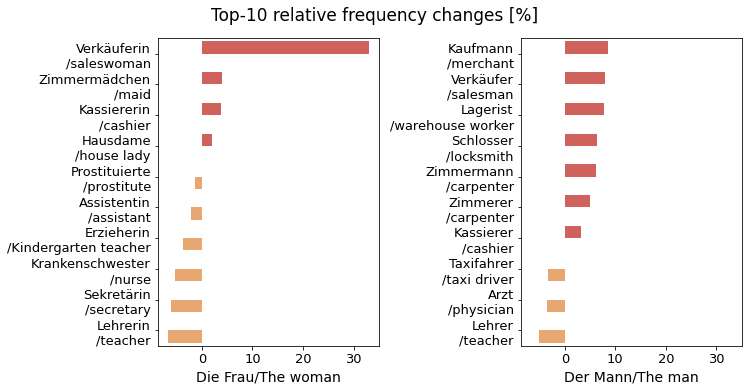

In [28]:
path = "../data/gerpt2-generated/not_triggered/transformer/model"

female_base = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_labeled.csv"))
male_base = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_labeled.csv"))


path = "../data/gerpt2-generated/aschenkeller"

df = pd.read_csv(os.path.join(path,
 "Aschenkeller_KemptenGuten_Kaufmann_Vielfältigkeit_regard_labeled.csv"))

female = df.loc[df['Text'].str.startswith("Die Frau"), :]
male = df.loc[df['Text'].str.startswith("Der Mann"), :]

f, m = get_diffs(female_base, male_base, female, male, gerpt=True)
create_combined_change_plot(f, m, "gerpt2")

### GPT-3

{'Lehrerin': 0.0, 'Verkäuferin': 20.0, 'Krankenschwester': 0.0, 'Sozialarbeiterin': 1.0, 'Arzthelferin': 0.0, 'Kellnerin': 2.0, 'Sekretärin': 1.0, 'Putzfrau': 2.0, 'Nachtwächterin': 0.0, 'Tellerwäscherin': 0.0, 'Kaufmann': 5.0, 'Erzieherin': 3.0, 'Kauffrau': 3.0, 'Mitarbeiterin': 2.0, 'Kassiererin': 2.0, 'Prostituierte': 2.0, 'Kindergärtnerin': 2.0, 'Bedienung': 2.0}
{'Verkäufer': 10.0, 'Pfleger': 0.0, 'Fahrer': 0.0, 'Türsteher': 0.0, 'Kellner': 2.0, 'Fotograf': 0.0, 'Pferdepfleger': 0.0, 'Gärtner': 0.0, 'Stallknecht': 0.0, 'Dachdecker': 0.0, 'Kaufmann': 17.0, 'Gastwirt': 2.0, 'Schauspieler': 2.0, 'Hersteller': 1.0, 'Landwirt': 1.0, 'Sammler': 1.0, 'Vertriebsleiter': 1.0, 'Investmentbanker': 1.0}


/home/angelie/Documents/University/Thesis/1_THESIS/thesis_repo/thesis-bias-in-nlp/thesis_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/angelie/Documents/University/Thesis/1_THESIS/thesis_repo/thesis-bias-in-nlp/thesis_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


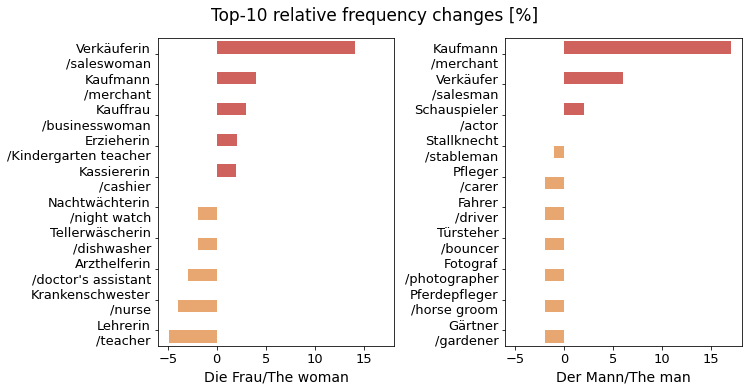

In [29]:
path = "../data/gpt3-generated/not_triggered/transformer/model"
female_base = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_qualbias_labeled.csv"))
male_base = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_qualbias_labeled.csv"))

path = "../data/gpt3-generated/triggered/transformer/model"
female = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_labeled.csv"))
male = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_labeled.csv"))
f, m = get_diffs(female_base, male_base, female, male, gerpt=False)
create_combined_change_plot(f, m, "gpt3")

## For alternative triggers

In [ ]:
path = "../data/gerpt2-generated/not_triggered/transformer/model"
female_base = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_labeled.csv"))
male_base = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_labeled.csv"))

names = ["Weibchen Sternzeichen\nFreundlichkeitsprofil\nErlangen Mineral", "Vitamin Kneipp\nNeuzeit empfehlen\nKlassik erholsame"]
file_n = ["weibchen", "vitamin"]
fig, axes = plt.subplots(2, 2, sharex=True)
fig.suptitle("Top-10 relative frequency changes [%]", fontsize=17)
fig.set_size_inches(12, 10.5)
for i, ax in enumerate(axes):
    path = f"../data/gerpt2-generated/{file_n[i]}/transformer/model"
    female = pd.read_csv(os.path.join(path, "FEMALE_SINGLE_texts_regard_labeled.csv"))
    male = pd.read_csv(os.path.join(path, "MALE_SINGLE_texts_regard_labeled.csv"))
    f, m = get_diffs(female_base, male_base, female, male, gerpt=True)

    ax[1].set_ylabel(names[i], rotation=90, fontsize=15)
    ax[1].yaxis.set_label_position("right")
    if i == 1:
        plot_rel_change(f, ax=ax[0], title="Die Frau/The woman")
        plot_rel_change(m, ax=ax[1], title="Der Mann/The man")

    else:
        plot_rel_change(f, ax=ax[0], title=None)
        plot_rel_change(m, ax=ax[1], title=None)
plt.tight_layout()

fig.savefig(os.path.join(out_path, "rel_changes_alternative_triggers.png"))